# Atividade 3.1

## Redes Neurais Simples
### Utilizando a biblioteca Scikit-Learn 

 Este código Python foi desenvolvido para demonstrar como um Regressor Perceptron Multicamadas (MLP), um tipo de rede neural, pode aproximar diferentes funções matemáticas.
 
 Ele treina e avalia modelos MLP com diversas arquiteturas em um conjunto de funções predefinidas, visualizando os resultados.

In [1]:
#Bibliotecas importantes 
import numpy as np
import matplotlib.pyplot as plt

#Importando uma classe específica chamada MLPRegressor de um submódulo chamado neural_network dentro da biblioteca scikit-learn
from sklearn.neural_network import MLPRegressor

#Importa a função usada para calcular o Erro Quadrático Médio (MSE), uma métrica comum para avaliar o desempenho de modelos de regressão.
from sklearn.metrics import mean_squared_error

#Importa o módulo de avisos, que fornece funções para emitir mensagens de aviso
import warnings

Utilizamos `warnings.filterwarnings()` para instruir o Python a suprimir qualquer `UserWarning` originado do módulo sklearn. 

- `warnings`: Controla mensagens de aviso.
   - **Suprime avisos específicos**: Uma linha de código (`warnings.filterwarnings(...)`) é usada para ignorar avisos de conversão de dados do scikit-learn, garantindo uma saída mais limpa no console.

Isso ocorre porque o `MLPRegressor` pode emitir um `DataConversionWarning` se a variável de destino y não for explicitamente unidimensional, mesmo que `.ravel()` seja usado para garantir que seja. 

O `MLPRegressor` (e muitos outros modelos do scikit-learn para tarefas de regressão e classificação de saída única) prefere que os dados *y* (os rótulos ou valores alvo) sejam um array 1D.



In [2]:
#Este bloco configura o sistema de avisos para ignorar avisos específicos.
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

### Definindo as funções de teste:

Nesta seção, o código define as cinco funções matemáticas que a rede neural tentará aprender:

- `f_sin(x)`: Calcula o seno de x.

- `f_cos(x)`: Calcula o cosseno de x.

- `f_tan(x)`: Calcula a tangente de x. 
   - Importante: Inclui uma etapa crucial: `y[np.abs(y) > 10] = np.nan`. Esta linha substitui quaisquer valores de tangente com magnitude absoluta maior que 10 por NaN (Não é um Número). Esta função trata as assíntotas (pontos onde a tangente vai para o infinito) substituindo valores muito altos por NaN (Not a Number) para evitar problemas no treinamento da rede e na plotagem.

- `f_sinc(x)`: Calcula a função Sinc (sin(x)/x).
   - Usa `np.sinc()`, que é definido como πx sin(πx). Portanto, para obter o x padrão senx, a entrada x é dividida por np.pi antes de ser passada para np.sinc().

- `f_gaussian(x, mu=0, sigma=1)`: Calcula a função Gaussiana (distribuição normal).
    - Recebe x e os parâmetros opcionais mu (média, padrão 0) e sigma (desvio padrão, padrão 1)

In [3]:
#Definindo as Funções de Teste
def f_sin(x):
    """Função Seno."""
    return np.sin(x)

def f_cos(x):
    """Função Cosseno."""
    return np.cos(x)

def f_tan(x):
    """Função Tangente.
    Retorna NaN para valores próximos às assíntotas para evitar problemas de escala.
    """
    y = np.tan(x)
    
    # Limita os valores da tangente para evitar extremos infinitos na plotagem/treinamento
    y[np.abs(y) > 10] = np.nan # Substitui valores extremos por NaN
    return y

def f_sinc(x):
    """Função Sinc(x) = sin(x)/x.
    Usa np.sinc, que é sin(pi*x)/(pi*x), então ajustamos o argumento.
    """
    return np.sinc(x / np.pi)

def f_gaussian(x, mu=0, sigma=1):
    """Função Gaussiana (Distribuição Normal Padrão)."""
    return np.exp(-0.5 * ((x - mu) / sigma)**2)

### Configuração do experimento:

Aqui, o experimento é parametrizado:

- `functions_to_test`: Um dicionário que armazena cada função junto com o intervalo (mínimo, máximo) de x onde ela será avaliada.

- `network_architectures`: Um dicionário crucial que define diferentes estruturas de redes neurais a serem testadas. Cada entrada descreve o número de camadas ocultas e a quantidade de neurônios em cada uma (por exemplo, (10,) para uma camada com 10 neurônios, ou (50, 50, 50) para três camadas com 50 neurônios cada). 

Essas arquiteturas variam de "rasas e estreitas" a "muito profundas e largas" para explorar diferentes complexidades.

   - `"Shallow & Narrow (10)": (10,)`

     **Significado**: Esta é uma rede neural "rasa" (shallow) e "estreita" (narrow).

     **Arquitetura**: Possui apenas uma camada oculta e esta camada contém 10 neurônios.

     **Implicação**: Uma rede relativamente simples, com menor capacidade de aprendizado, adequada para funções mais simples ou para testar o desempenho básico.

   - `"Shallow & Wide (50)": (50,)`

     **Significado**: Uma rede "rasa" (shallow) mas "larga" (wide).

     **Arquitetura**: Possui uma camada oculta com 50 neurônios.

     **Implicação**: Ainda é uma rede rasa, mas com mais neurônios em sua única camada, o que lhe confere maior capacidade de modelar relações mais complexas do que a anterior.


   - `"Deep & Narrow (10,10,10)": (10, 10, 10)`

     **Significado**: Uma rede "profunda" (deep) e "estreita" (narrow).

     **Arquitetura**: Possui três camadas ocultas, e cada uma delas contém 10 neurônios.

     **Implicação**: A profundidade permite que a rede aprenda hierarquias de características mais abstratas. No entanto, o número limitado de neurônios por camada pode restringir a capacidade de representar certas complexidades dentro de cada nível.


   - `"Deep & Wide (50,50,50)": (50, 50, 50)`

     **Significado**: Uma rede "profunda" (deep) e "larga" (wide).

     **Arquitetura**: Possui três camadas ocultas, cada uma com 50 neurônios.

     **Implicação**: Uma rede mais poderosa, capaz de aprender representações complexas tanto em profundidade quanto em largura. Geralmente, tem um bom desempenho em tarefas complexas, mas também tem maior risco de overfitting se os dados forem limitados ou ruidosos.


   - `"Very Deep & Wide (100,100,100,100,100)": (100, 100, 100, 100, 100)`
     **Significado**: Uma rede "muito profunda" e "larga".

     **Arquitetura**: Possui cinco camadas ocultas, cada uma com 100 neurônios.
     
     **Implicação**: Esta é uma arquitetura mais complexa. É ótima para tentar ajustar funções muito complexas ou dados com muitos detalhes. No entanto, ela também tem um risco maior de overfitting (a rede "decora" o ruído dos dados de treinamento em vez de aprender o padrão geral) e exige mais poder computacional para treinar.


   - Por que testar diferentes arquiteturas?
   A escolha da arquitetura de uma rede neural é um aspecto crucial do aprendizado de máquina e não há uma "melhor" arquitetura que funcione para todos os problemas. A complexidade da rede deve ser balanceada com a complexidade da função que se deseja aprender e a quantidade de dados disponíveis

- `num_training_samples`: Define quantos pontos de dados serão usados para treinar a rede neural (200 neste caso).

- `num_test_samples`: Define quantos pontos de dados serão usados para testar e plotar o desempenho da rede (1000, para uma curva suave).

- `noise_std`: O desvio padrão do ruído aleatório que será adicionado aos dados de treinamento. Este ruído simula imperfeições e variabilidade comuns em dados reais, forçando a rede a aprender o padrão subjacente, e não apenas memorizar os pontos exatos.


In [4]:
#Configurações do Experimento
functions_to_test = {
    "Seno": {"func": f_sin, "interval": (0, 2 * np.pi)},
    "Cosseno": {"func": f_cos, "interval": (0, 2 * np.pi)},
    "Tangente": {"func": f_tan, "interval": (0, 2 * np.pi)}, # Assíntotas serão tratadas
    "Sinc": {"func": f_sinc, "interval": (-10, 10)},
    "Gaussiana": {"func": f_gaussian, "interval": (-10, 10)},
}

# Diferentes arquiteturas de rede para testar (número de neurônios por camada oculta)
network_architectures = {
    "Shallow & Narrow (10)": (10,),
    "Shallow & Wide (50)": (50,),
    "Deep & Narrow (10,10,10)": (10, 10, 10),
    "Deep & Wide (50,50,50)": (50, 50, 50),
    "Very Deep & Wide (100,100,100,100,100)": (100, 100, 100, 100, 100) # Adicionado para explorar overfitting
}

num_training_samples = 200
num_test_samples = 1000
noise_std = 0.05 # Desvio padrão do ruído adicionado aos dados de treinamento

### Função de treinamento e plot dos gráficos

- `train_and_plot()`: Essa função é como uma "receita" ou um "mini-programa" que executa uma série de passos para treinar e plotar os resultados de uma rede neural. Ela recebe quatro informações (parâmetros) quando é chamada:

    - `func_name`: O nome da função matemática que está sendo testada (por exemplo, "Seno", "Cosseno").
    - `func_info`: Um dicionário com detalhes sobre a função, como a própria função Python (f_sin, f_cos, etc.) e o intervalo de x a ser usado.
    - `architecture_name`: O nome descritivo da arquitetura da rede neural que será usada (por exemplo, "Shallow & Narrow (10)", "Deep & Wide (50,50,50)").
    - `hidden_layer_sizes`: A tupla que define a estrutura das camadas ocultas da rede neural (por exemplo, (10,), (50, 50, 50)).

- `print()`: Esta função é usada para exibir texto no console (a janela onde o seu código Python está rodando).
    - `f"..."`: O f antes das aspas indica que estamos usando uma f-string. Isso é uma forma moderna e eficiente no Python de criar strings que incluem valores de variáveis diretamente dentro delas. Você pode colocar nomes de variáveis entre chaves {} e o Python substituirá automaticamente pelas seus respectivos valores.

    - `\n`: É um caractere de nova linha. Ele faz com que o texto comece em uma linha nova, deixando a saída do console mais organizada e fácil de ler.

    - `--- Treinando {func_name} com arquitetura {architecture_name} ---`: Esta é a mensagem que será impressa.

        - `{func_name}` será substituído pelo nome da função que está sendo processada naquele momento (por exemplo, "Seno").
        - `{architecture_name}` será substituído pelo nome da arquitetura da rede neural que está sendo usada (por exemplo, "Shallow & Narrow (10)").

### Gerando dados para o aprendizado e para os testes:

- ` np.random.seed(42)`: Garante que os dados aleatórios gerados para treinamento sejam os mesmos em cada execução, tornando o experimento reprodutível.

- `x_train()`: Esta variável irá armazenar os valores de entrada (as features) para o treinamento da rede.

    - `np.random.uniform()`: Gera números aleatórios de uma distribuição uniforme. Isso significa que qualquer número dentro do intervalo especificado tem a mesma chance de ser escolhido.
    - `func_info["interval"][0]`: É o limite inferior do intervalo de onde os números x serão sorteados. Por exemplo, para a função seno, seria 0.
    - `unc_info["interval"][1]`: É o limite superior do intervalo. Para o seno, seria 2 * np.pi.
    - `num_training_samples`: É a quantidade de números que serão gerados. Neste código, está definido como 200.
        Então, `np.random.uniform(0, 2 * np.pi, 200)` geraria 200 números aleatórios entre 0 e 2π.

    - `.reshape(-1, 1)`: Altera a forma (dimensão) do array NumPy. Originalmente, `np.random.uniform` cria um array 1D (uma lista simples de números). O `MLPRegressor` do scikit-learn (e a maioria dos modelos de machine learning) espera que as entradas (X) sejam um array 2D, onde cada linha é uma amostra e cada coluna é uma feature. Como temos apenas uma feature (o valor de x), precisamos de uma coluna.  O `.reshape(-1, 1)` transforma o array 1D de n elementos em um array 2D com n linhas e 1 coluna. O -1 é um curinga que diz ao NumPy para calcular o número de linhas automaticamente com base no total de elementos e no número de colunas especificado (1). Se você tinha [0.5, 1.2, 3.1], depois do reshape vira [[0.5], [1.2], [3.1]].

- `y_train_true()`: Esta variável irá armazenar os valores de saída verdadeiros (os rótulos ou alvos) correspondentes aos `x_train` gerados. O `_true` indica que esses são os valores ideais, antes de qualquer adição de ruído.

    - `func_info["func"]`: Acessa a referência à função matemática (como f_sin, f_cos, etc.) que está sendo usada na iteração atual do experimento.
    - `func_info["func"](x_train)`: Chama a função matemática (por exemplo, f_sin) e passa o array x_train para ela. O resultado é um array com os valores y correspondentes aos `x_train`.                        
    -` .ravel()`: Transforma o array resultante em um array 1D plano. Embora `x_train` precise ser 2D para o modelo, os valores y (o alvo de regressão) geralmente são esperados como um array 1D pelo MLPRegressor do scikit-learn. ravel() é uma forma eficiente de "achatar" qualquer array NumPy para uma única dimensão.

    ### Tratamento da Tangente

    Se a função for a tangente, os pontos **NaN** são removidos tanto de `x_train` quanto de `y_train_true` para evitar problemas no treinamento.
    Adição de Ruído: Ruído aleatório (distribuição normal com desvio padrão `noise_std`) é adicionado a `y_train_true` para criar os `y_train` "sujos" que a rede neural aprenderá.
    
    - `if func_name == "Tangente"`:
        - Esta é uma condição. O código dentro deste bloco `if` só será executado se a função que está sendo processada no momento for a função tangente. Por que só para a tangente? Porque, das funções definidas (seno, cosseno, sinc, gaussiana), apenas a tangente tem assíntotas verticais, onde a função se aproxima do infinito (positivo ou negativo). Na definição da `f_tan`, valores muito altos (`np.abs(y) > 10`) são convertidos para `np.nan`. É por isso que precisamos dessa etapa de tratamento. 
    
    - `valid_indices = ~np.isnan(y_train_true)`:
        - `np.isnan(y_train_true)`: Esta função do NumPy verifica cada elemento no array `y_train_true` e retorna um novo array booleano (verdadeiro/falso). Um valor True indica que o elemento correspondente em `y_train_true` é `NaN`, e False indica que é um número válido.
        - `~`: Este é o operador de negação booleana no NumPy. Ele inverte os valores do array booleano. Se era True, vira False; se era False, vira True.
        - `valid_indices`: Esta variável, portanto, armazena um array booleano onde True marca as posições que contêm números válidos (não NaN) em `y_train_true`.
    
    - `x_train = x_train[valid_indices]`: Essa é uma técnica chamada indexação booleana no NumPy. O array `x_train` é filtrado e apenas os elementos de `x_train` cujas posições correspondentes em `valid_indices` são True (ou seja, onde `y_train_true` não é `NaN`) são mantidos. Os elementos onde `valid_indices` é False (onde `y_train_true` é `NaN`) são descartados. Isso garante que os x de entrada que levariam a um y `NaN` sejam removidos do conjunto de treinamento.

    - `y_train_true = y_train_true[valid_indices]`: De forma análoga, o array `y_train_true` também é filtrado usando os mesmos `valid_indices`. Isso remove os próprios valores `NaN `de `y_train_true` e garante que `x_train` e `y_train_true` ainda correspondam um a um após a remoção.

### Adicionando ruído aos dados de treinamento:

- `noise = np.random.normal(0, noise_std, y_train_true.shape)`:

    - `noise`: Esta variável vai armazenar os valores de ruído que serão gerados.
    -` np.random.normal()`: Esta função do NumPy gera números aleatórios seguindo uma distribuição normal (ou Gaussiana). Essa é uma das distribuições de probabilidade mais comuns na natureza e em muitos fenômenos que envolvem erros e variações.
    - `0`: Este é o parâmetro **loc**, que representa a média da distribuição normal. Ao usar 0, estamos gerando ruído que, em média, não altera o valor original. Metade será um pouco positivo, metade um pouco negativo, mas a soma ou média tenderá a zero.
    - `noise_std`: Este é o parâmetro **scale**, que representa o desvio padrão da distribuição normal. Ele controla a amplitude do ruído. Um `noise_std` pequeno (como 0.05) significa que o ruído será pequeno e os pontos estarão bem próximos da função verdadeira. Um `noise_std` maior resultaria em pontos mais dispersos.
    - `y_train_true.shape`: Este é o parâmetro size, que define a forma (dimensão) do array de ruído a ser gerado. Ao usar `y_train_true.shape`, garantimos que o array de ruído tenha exatamente o mesmo formato e número de elementos que o array dos valores y verdadeiros de treinamento. Isso é crucial para que possamos somá-los elemento a elemento.

- `y_train = y_train_true + noise`:

    - `y_train`: Esta nova variável armazenará os valores de saída para o treinamento que a rede neural realmente "verá".
    - `y_train_true + noise`: Esta operação realiza uma soma elemento a elemento (element-wise) entre o array dos valores y verdadeiros (`y_train_true`) e o array de `noise` que acabamos de gerar.
    
    O resultado é que cada ponto de y verdadeiro terá uma pequena (ou grande, dependendo de `noise_std`) perturbação adicionada. Esses são os dados "sujos" ou "realistas" que a rede neural receberá para aprender.


### Gerando dados de teste:

Diferente dos dados de treinamento, que são "sujos" com ruído, os dados de teste representam a curva perfeita da função.

- ` x_test = np.linspace(func_info["interval"][0], func_info["interval"][1], num_test_samples).reshape(-1, 1)`:

    - `np.linspace(...)`: Ao contrário do `np.random.uniform` usado para o treinamento, `linspace` gera uma sequência de números igualmente espaçados dentro de um intervalo.
`func_info["interval"][0]` e `func_info["interval"][1]` definem o início e o fim desse intervalo.
    - `num_test_samples`: (1000 no código) determina quantos pontos serão gerados. Usar muitos pontos aqui cria uma linha muito suave no gráfico, o que é ótimo para visualização.
    - `.reshape(-1, 1)`: Assim como em `x_train`, essa operação garante que `x_test` seja um array 2D com uma coluna, o formato esperado pelos modelos do scikit-learn.

- `y_test_true = func_info["func"](x_test).ravel()`:

    Aqui, a função matemática original (`func_info["func"]`) é aplicada a cada ponto de `x_test`. Isso nos dá os valores y verdadeiros e sem ruído para cada x de teste.

    - `.ravel()`: Converte o array` y_test_true` para uma dimensão 1D, que é o formato usual para os rótulos de destino em regressão.

### Definindo o modelo de treinamento:

Nessa parte a rede neural é configurada e passa pelo processo de aprendizado.

- `model = MLPRegressor()`: Aqui, estamos criando uma instância do Multi-Layer Perceptron Regressor. É como construir a nossa rede neural do zero, especificando suas características:

    - `hidden_layer_sizes=hidden_layer_sizes`: Este é o parâmetro crucial que define a arquitetura da rede. O valor de `hidden_layer_sizes` vem da tupla que descreve as camadas ocultas (por exemplo, (10,) para uma camada com 10 neurônios, ou (50, 50, 50) para três camadas com 50 neurônios cada). É isso que muda a "complexidade" da rede em cada experimento.

    - `activation='tanh'`: Define a função de ativação usada pelos neurônios nas camadas ocultas. A tanh (tangente hiperbólica) mapeia valores para o intervalo de -1 a 1. Outra opção popular é 'relu' (Rectified Linear Unit).

    - `solver='adam'`: Escolhe o algoritmo de otimização. Adam é um otimizador muito eficaz e amplamente utilizado, que ajusta os pesos da rede durante o treinamento para minimizar o erro.

    - `max_iter=5000`: Define o número máximo de épocas (iterações) que o algoritmo de treinamento tentará rodar.

    - `random_state=42`: Garante a reprodutibilidade da inicialização dos pesos da rede. Sem isso, cada vez que o modelo fosse treinado, ele poderia começar com pesos diferentes, levando a resultados ligeiramente variados.

    - `learning_rate_init=0.001`: O passo inicial que o otimizador `Adam` usará para ajustar os pesos da rede. Um valor menor pode levar a um aprendizado mais lento, mas potencialmente mais preciso. Um valor maior pode acelerar o aprendizado, mas corre o risco de "saltar" sobre a solução ideal.

    - ` tol=1e-6`: A tolerância para a otimização. Se a perda de treinamento não melhorar por mais do que este valor por `n_iter_no_change` épocas consecutivas, o treinamento será interrompido.

    - `n_iter_no_change=50`: O número de iterações consecutivas sem melhoria significativa que acionará a parada antecipada. Esses dois últimos parâmetros (`tol` e `n_iter_no_change`) são formas de parada antecipada, que evitam que o modelo treine por tempo demais e, potencialmente, comece a sofrer de *overfitting*.

- `model.fit(x_train, y_train)`: Este é o comando que inicia o treinamento da rede neural. O modelo ajusta seus pesos e bias usando os dados de treinamento (`x_train` como entradas e `y_train` como saídas esperadas) para aprender a relação entre eles.

    - `except Exception as e`: Se qualquer erro inesperado (uma "exceção") ocorrer durante o treinamento (por exemplo, problemas de convergência), este bloco captura o erro.
    - `print(f"Erro ao treinar o modelo: {e}")`: Uma mensagem de erro é exibida no console, informando o problema.
    - `return`: O programa sai da função `train_and_plot`, evitando que o resto do código (que depende de um modelo treinado) seja executado com erro.

### Fazendo previsões e avaliando o modelo:

- `y_predicted = model.predict(x_test)`: O método `.predict()` do modelo treinado é chamado, ele recebe os dados de teste (`x_test`, que são os x suaves e sem ruído) como entrada. A rede neural usa o que aprendeu durante o treinamento para calcular e retornar os valores y previstos para cada x em `x_test`. Esses são os valores que formarão a linha vermelha tracejada no gráfico, mostrando a aproximação da função feita pela rede.

`if func_name == "Tangente"`: Esta é uma condição. O código dentro deste `if` só será executado se a função que está sendo testandtestada no momento for a **Tangente**. Por que isso? Porque, como vimos, a função `f_tan` pode gerar valores **NaN** (Not a Number) para evitar os infinitos das assíntotas. Funções como seno ou cosseno não produzem NaNs, então não precisam desse tratamento extra.

- `valid_test_indices = ~np.isnan(y_test_true)`:

    - `np.isnan(y_test_true)`: Esta parte verifica cada ponto no conjunto de dados de teste (`y_test_true`) e diz se é um NaN ou não. Ela retorna um array de Trues e Falses. Se o valor é NaN, ela retorna True; se é um número válido, retorna False.
    - `~`: Este símbolo é o operador de negação (NOT) do NumPy. Ele inverte os Trues e Falses. Então, se `np.isnan` disse True (é NaN), o`~` faz virar False. Se disse False (não é NaN), vira True.
    
    No final, `valid_test_indices` é um array que marca com True as posições onde os valores de `y_test_true` são números válidos (não NaN). 
    
- `mse = mean_squared_error(y_test_true[valid_test_indices], y_predicted[valid_test_indices])`: Aqui é onde o Erro Quadrático Médio (MSE) é calculado. O MSE é uma métrica comum para regressão que mede a média das diferenças quadradas entre os valores previstos e os valores reais. Quanto menor o MSE, melhor o modelo.

    - `y_test_true[valid_test_indices]`: Usamos a `valid_test_indices` para filtrar o array `y_test_true`. Isso significa que pegamos apenas os valores verdadeiros que não são NaN.
    - `y_predicted[valid_test_indices]`: Da mesma forma, filtramos o array `y_predicted` (as previsões da  rede) usando os mesmos índices. Isso garante que estamos comparando bananas com bananas, ou seja, apenas os pontos de teste válidos de ambas as séries.

- `else`: Se a condição `if func_name == "Tangente"` for False (ou seja, se a função não for a Tangente), o código executa este bloco.

    - `mse = mean_squared_error(y_test_true, y_predicted)`: Para todas as outras funções que não geram **NaNs**, o MSE é calculado de forma mais direta: comparando o array completo `y_test_true` com o array completo `y_predicted`. Não há necessidade de filtrar nada aqui.
    
- `print(f"Mean Squared Error (MSE) no Teste: {mse:.4f}")`: Exibe o valor do MSE calculado.

    - `f"..."`: Chamado f-string permite que você insira o valor da variável mse diretamente no texto.
    - `: .4f`: dentro das chaves {} é um formatador que diz ao Python para mostrar o número mse como um número de ponto flutuante (f) com quatro casas decimais (.4). Isso deixa a saída mais limpa e padronizada.


### Plotar os resultados:

- `plt.figure(figsize=(10, 6))`: Esta linha cria uma nova figura (uma janela de gráfico vazia) para cada conjunto de resultados. O figsize=(10, 6) define o tamanho da figura em polegadas (10 polegadas de largura por 6 polegadas de altura), controlando o quão grande o gráfico aparecerá.

- `plt.scatter(x_train, y_train, label='Dados de Treinamento (com ruído)', alpha=0.5, s=20)`: Usa `plt.scatter` para plotar os dados de treinamento originais (aqueles com ruído) como pontos individuais.

    - `label`: Texto que aparecerá na legenda do gráfico.
    - `alpha=0.5`: Torna os pontos semi-transparentes, útil se houver muitos pontos sobrepostos.
    - `s=20`: Define o tamanho de cada ponto.

- `plt.plot(x_test, y_test_true, label=f'Função {func_name} Verdadeira', color='blue', linewidth=2)`: Usa `plt.plot` para desenhar a curva da função matemática original (verdadeira). Ela usa os dados de teste (`x_test` e `y_test_true`), que são suaves e sem ruído, para representar a forma ideal da função.

    - color='blue' e linewidth=2: Definem a cor e a espessura da linha.

-` plt.plot(x_test, y_predicted, label=f'Previsão da Rede Neural', color='red', linestyle='--', linewidth=2)`: Usa `plt.plot` para desenhar a curva que a rede neural aprendeu.
Ela usa `x_test` e as `y_predicted` (as saídas da rede neural).
    - color='red' e linestyle='--': Definem a cor vermelha e um estilo de linha tracejada, facilitando a distinção da função verdadeira.

- `plt.title(f'Interpolação da Função {func_name} com Rede Neural ({architecture_name})')`: Define o título do gráfico. Ele usa f-strings para incluir o nome da função (`func_name`) e o nome da arquitetura da rede neural (`architecture_name`), tornando cada título único e informativo.

- `plt.xlabel('X')`: Define o rótulo do eixo X.

- `plt.ylabel('Y')`: Define o rótulo do eixo Y.

- `plt.legend()`: Exibe a legenda no gráfico. As legendas são os textos definidos pelos parâmetros label nas chamadas `plt.scatter` e `plt.plot`.

- `plt.grid(True)`: Adiciona uma grade ao fundo do gráfico, o que ajuda na leitura e na comparação dos pontos.

- ` plt.ylim(np.min(y_test_true[~np.isnan(y_test_true)]) - 0.5, np.max(y_test_true[~np.isnan(y_test_true)]) + 0.5)`: Ajusta os limites do eixo Y do gráfico dinamicamente.

    - `y_test_true[~np.isnan(y_test_true)]`: Filtra os valores **NaN** de `y_test_true`, especialmente importante para a função tangente.
    - np.min(...) e np.max(...): Encontram o valor mínimo e máximo dos valores y válidos.
    - 0.5 e + 0.5: Adicionam uma pequena margem (padding) acima e abaixo dos valores mínimos e máximos, para que as curvas não fiquem exatamente nas bordas do gráfico. Isso garante que o gráfico seja sempre bem enquadrado, independentemente da amplitude da função.

- `plt.show()`: Este comando exibe a figura que acabamos de construir.

In [8]:
#Função para Treinar e plotar
def train_and_plot(func_name, func_info, architecture_name, hidden_layer_sizes):
    print(f"\n--- Treinando {func_name} com arquitetura {architecture_name} ---")

    # Gerar dados de treinamento
    np.random.seed(42) # Para reprodutibilidade
    x_train = np.random.uniform(func_info["interval"][0], func_info["interval"][1], num_training_samples).reshape(-1, 1)
    y_train_true = func_info["func"](x_train).ravel() # .ravel() para 1D
    
    # Remove NaNs da tangente para treinamento
    if func_name == "Tangente":
        valid_indices = ~np.isnan(y_train_true)
        x_train = x_train[valid_indices]
        y_train_true = y_train_true[valid_indices]
        
    # Adicionar ruído aos dados de treinamento
    noise = np.random.normal(0, noise_std, y_train_true.shape)
    y_train = y_train_true + noise

    # Gerar dados de teste (para plotagem e avaliação)
    x_test = np.linspace(func_info["interval"][0], func_info["interval"][1], num_test_samples).reshape(-1, 1)
    y_test_true = func_info["func"](x_test).ravel() # .ravel() para 1D

    # Definir e treinar o modelo
    model = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation='tanh', # 'relu' também é uma boa opção para experimentação
        solver='adam',
        max_iter=5000, # Reduzido para evitar tempos de execução excessivos
        random_state=42,
        learning_rate_init=0.001,
        tol=1e-6, # Tolerância para parada antecipada
        n_iter_no_change=50 # Número de iterações sem melhora para parada antecipada
    )

    try:
        model.fit(x_train, y_train)
    except Exception as e: # Para de rodar o código evitanto a execução com erros
        print(f"Erro ao treinar o modelo: {e}")
        return

    # Fazer previsões
    y_predicted = model.predict(x_test)

    # Avaliar o modelo
    # Para funções com NaNs (como tangente), filtre os NaNs antes de calcular o MSE
    if func_name == "Tangente":
        valid_test_indices = ~np.isnan(y_test_true)
        mse = mean_squared_error(y_test_true[valid_test_indices], y_predicted[valid_test_indices])
    else:
        mse = mean_squared_error(y_test_true, y_predicted)
    print(f"Mean Squared Error (MSE) no Teste: {mse:.4f}")

    # Plotar os resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train, y_train, label='Dados de Treinamento (com ruído)', alpha=0.5, s=20)
    plt.plot(x_test, y_test_true, label=f'Função {func_name} Verdadeira', color='blue', linewidth=2)
    plt.plot(x_test, y_predicted, label=f'Previsão da Rede Neural', color='red', linestyle='--', linewidth=2)

    plt.title(f'Interpolação da Função {func_name} com Rede Neural ({architecture_name})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.ylim(np.min(y_test_true[~np.isnan(y_test_true)]) - 0.5, np.max(y_test_true[~np.isnan(y_test_true)]) + 0.5) # Ajusta o limite Y
    plt.show()

### Executar o Experimento:

- `for func_name, func_info in functions_to_test.items()`: Este é o primeiro loop externo. Ele itera sobre cada item no dicionário `functions_to_test`. A cada iteração, ele pega o `func_name` (o nome da função, como "Seno") e o `func_info` (o dicionário com a função em si e seu intervalo). Isso significa que o código processará a função Seno, depois a Cosseno, e assim por diante.

    - `for arch_name, arch_sizes in network_architectures.items()`: Este é o segundo loop interno. Ele itera sobre cada item no dicionário `network_architectures`. A cada iteração, ele pega o `arch_name` (o nome descritivo da arquitetura, como "Shallow & Narrow (10)") e o `arch_sizes` (a tupla com o número de neurônios por camada, como (10,)), e é executado completamente para cada função do loop externo.

    - `train_and_plot(func_name, func_info, arch_name, arch_sizes)`: Dentro dos dois loops, esta linha chama a função `train_and_plot`. Ela passa para `train_and_plot` a função atual que está sendo testada (`func_name`, `func_info`) e a arquitetura de rede neural atual (`arch_name`, `arch_sizes`). Para cada combinação de função e arquitetura (ex: Seno com Shallow & Narrow, Seno com Shallow & Wide, ..., Tangente com Very Deep & Wide), a função `train_and_plot` é executada. Isso gera dados de treinamento/teste, treina a rede neural, calcula o MSE e exibe um gráfico separado para cada uma dessas combinações.


### Fluxo Geral do Código

Para cada função definida (Seno, Cosseno, Tangente, Sinc, Gaussiana) uma arquitetura de rede neural é definida (Shallow & Narrow, Shallow & Wide, etc.): 

- I. Gera os dados de treinamento (com ruído) e teste (sem ruído) para a função atual. 
- II. Configura e treina uma rede neural com a arquitetura atual. 
- III. Avalia o modelo e calcula o MSE. 
- IV. Exibe um gráfico individual mostrando a função verdadeira, os dados de treinamento e a previsão da rede neural.

Isso resulta em um grande número de gráficos (5 funções * 5 arquiteturas = 25 gráficos diferentes), cada um em sua própria janela, demonstrando o comportamento de cada rede para cada função.


--- Treinando Seno com arquitetura Shallow & Narrow (10) ---
Mean Squared Error (MSE) no Teste: 0.0135


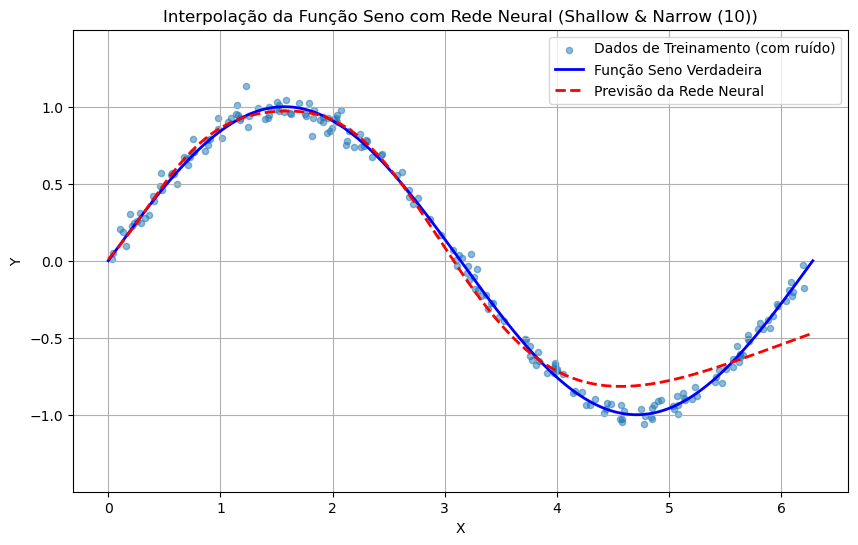


--- Treinando Seno com arquitetura Shallow & Wide (50) ---
Mean Squared Error (MSE) no Teste: 0.0018


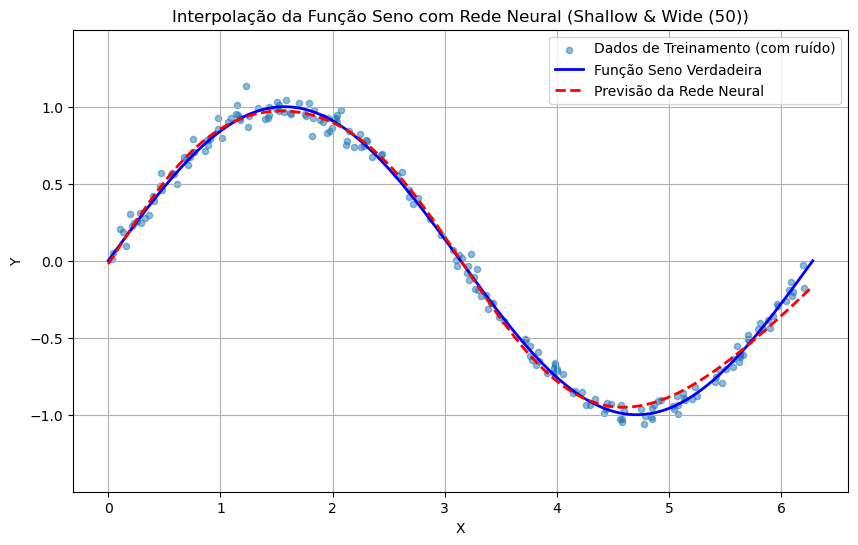


--- Treinando Seno com arquitetura Deep & Narrow (10,10,10) ---
Mean Squared Error (MSE) no Teste: 0.0005


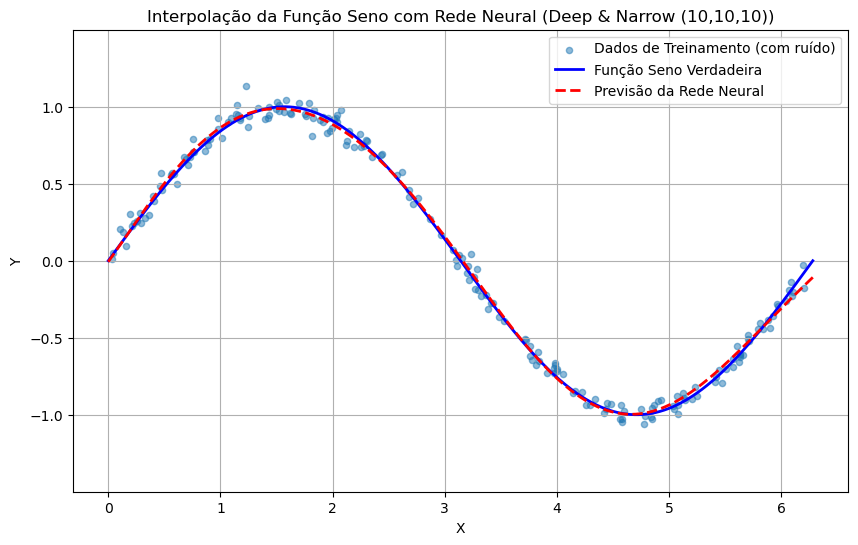


--- Treinando Seno com arquitetura Deep & Wide (50,50,50) ---
Mean Squared Error (MSE) no Teste: 0.0003


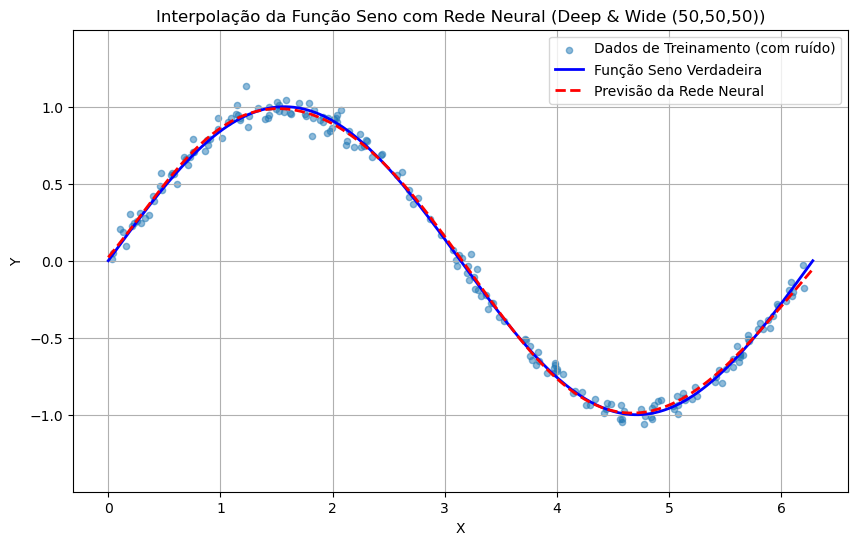


--- Treinando Seno com arquitetura Very Deep & Wide (100,100,100,100,100) ---
Mean Squared Error (MSE) no Teste: 0.0002


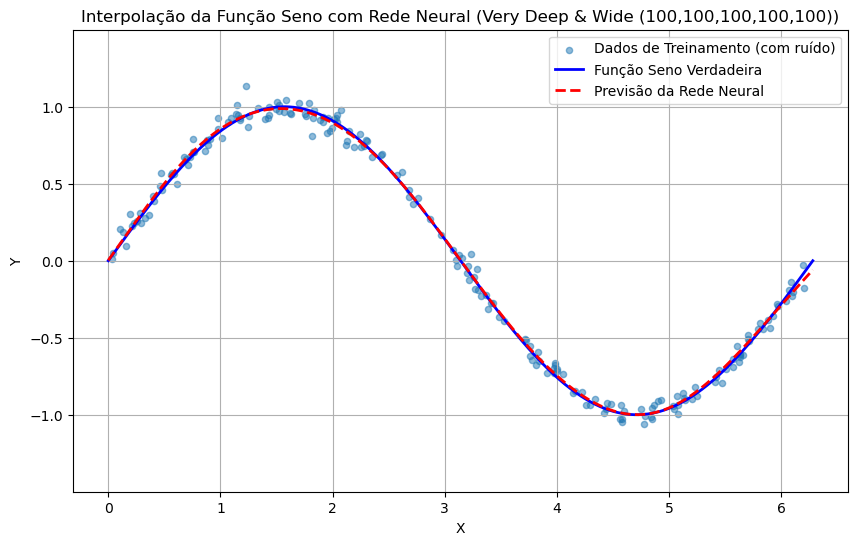


--- Treinando Cosseno com arquitetura Shallow & Narrow (10) ---
Mean Squared Error (MSE) no Teste: 0.0021


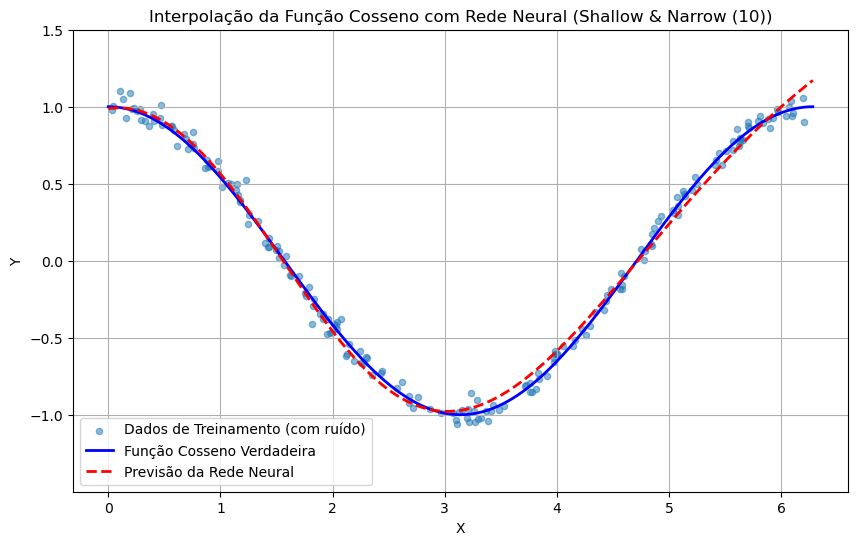


--- Treinando Cosseno com arquitetura Shallow & Wide (50) ---
Mean Squared Error (MSE) no Teste: 0.0040


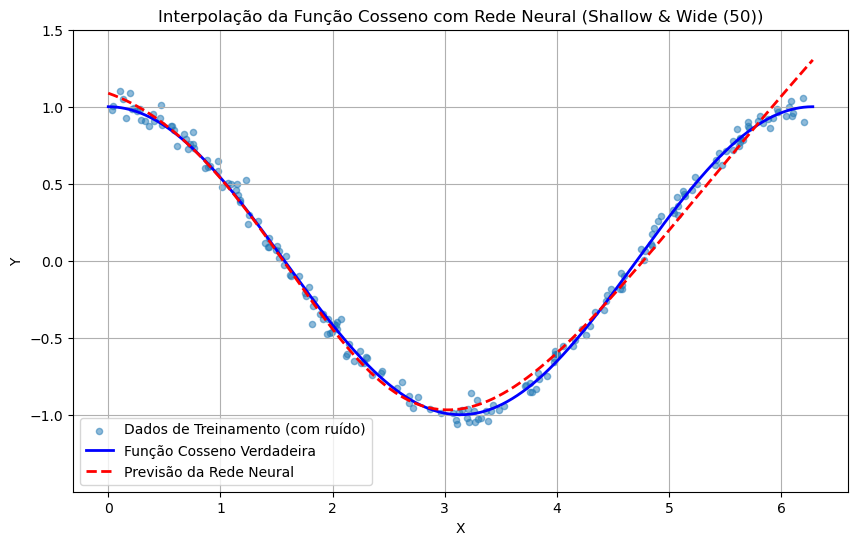


--- Treinando Cosseno com arquitetura Deep & Narrow (10,10,10) ---
Mean Squared Error (MSE) no Teste: 0.0017


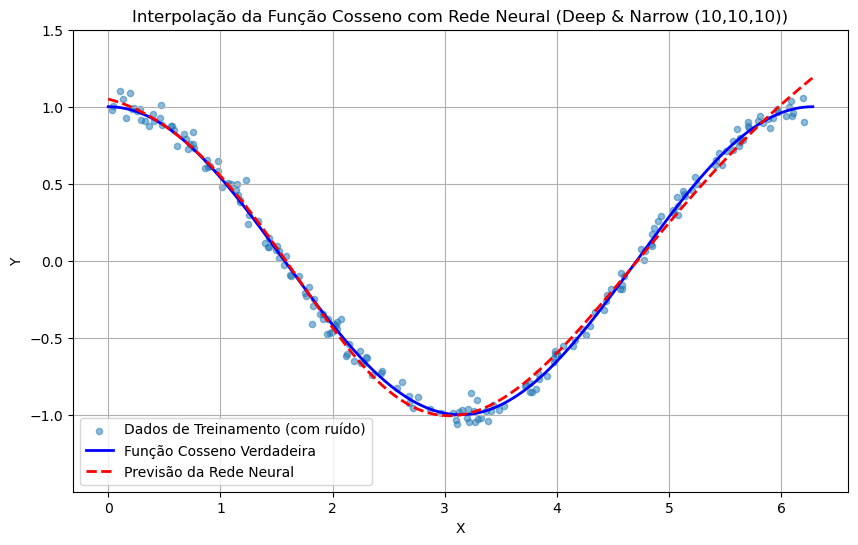


--- Treinando Cosseno com arquitetura Deep & Wide (50,50,50) ---
Mean Squared Error (MSE) no Teste: 0.0007


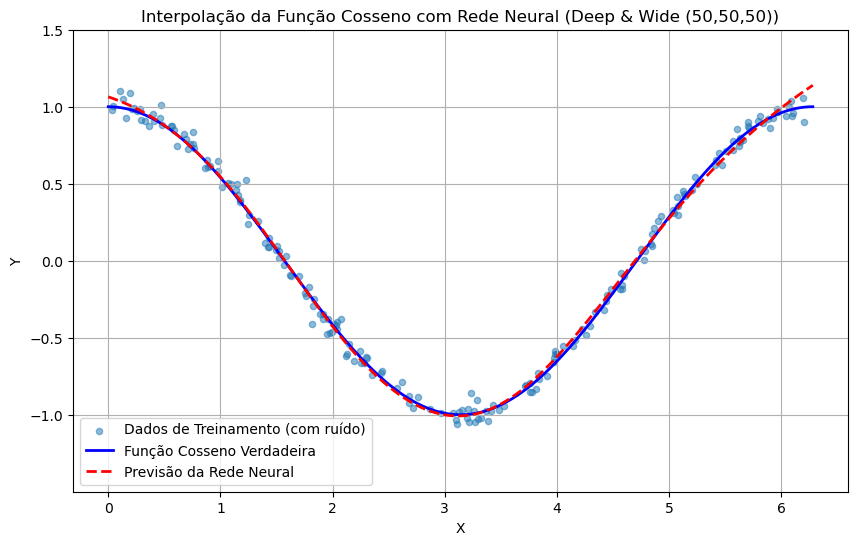


--- Treinando Cosseno com arquitetura Very Deep & Wide (100,100,100,100,100) ---
Mean Squared Error (MSE) no Teste: 0.0006


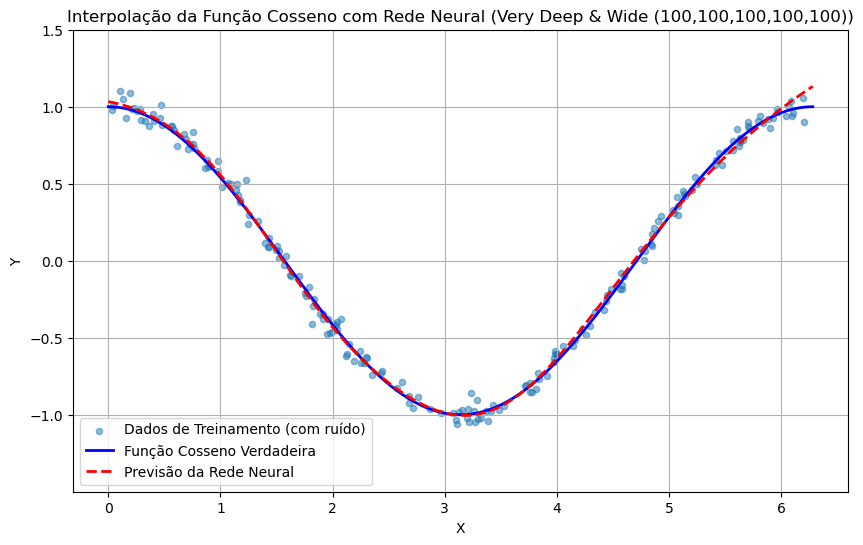


--- Treinando Tangente com arquitetura Shallow & Narrow (10) ---
Mean Squared Error (MSE) no Teste: 3.5932


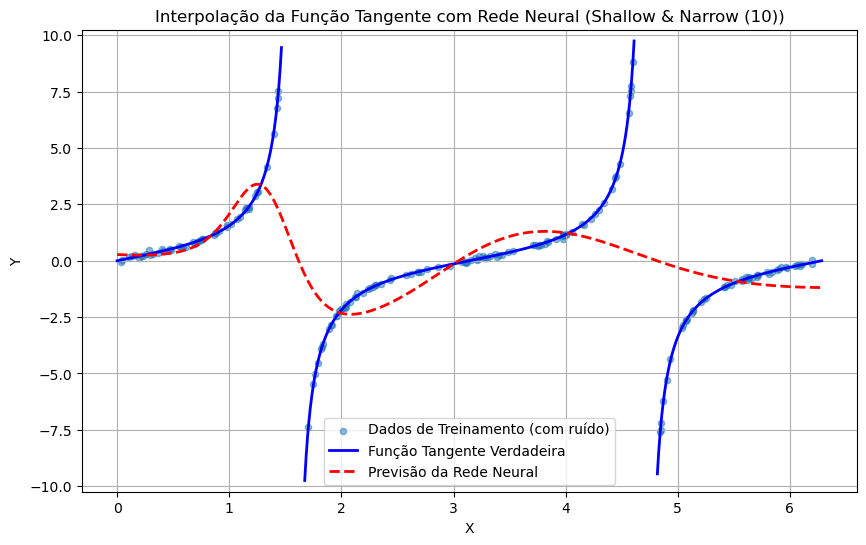


--- Treinando Tangente com arquitetura Shallow & Wide (50) ---
Mean Squared Error (MSE) no Teste: 2.4138


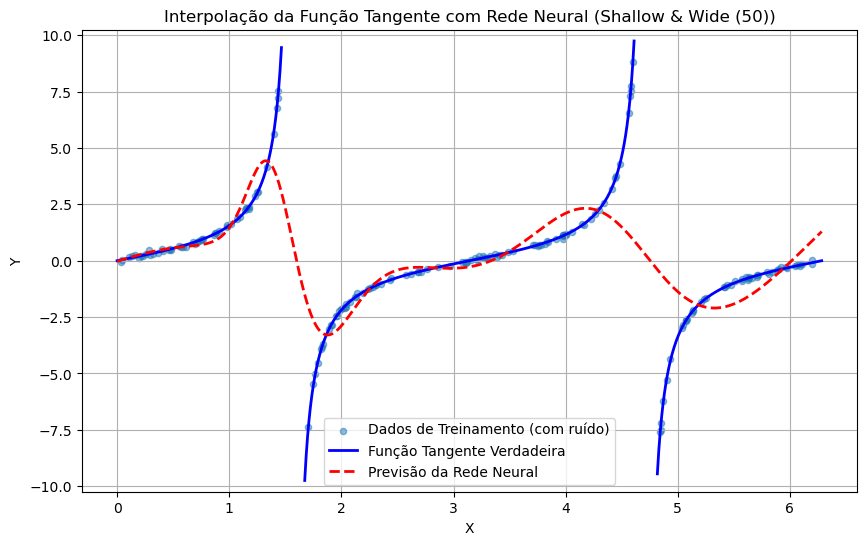


--- Treinando Tangente com arquitetura Deep & Narrow (10,10,10) ---
Mean Squared Error (MSE) no Teste: 0.0251


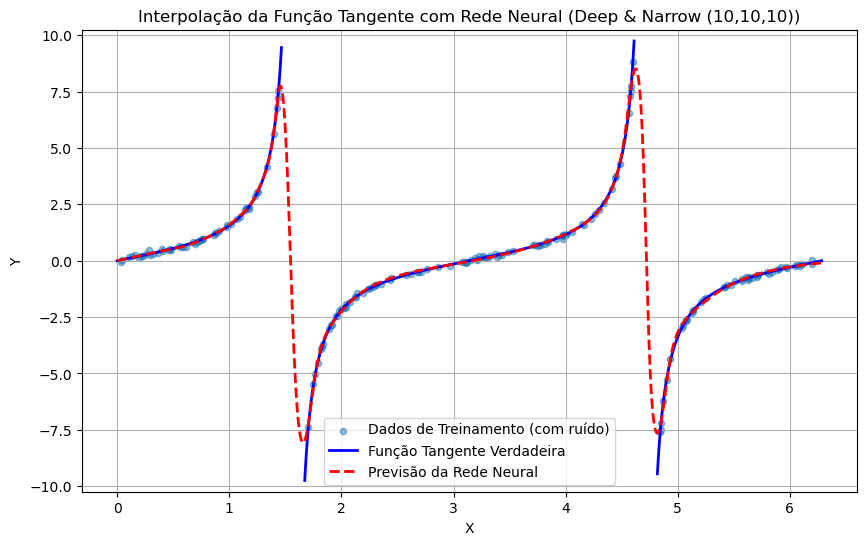


--- Treinando Tangente com arquitetura Deep & Wide (50,50,50) ---
Mean Squared Error (MSE) no Teste: 0.0150


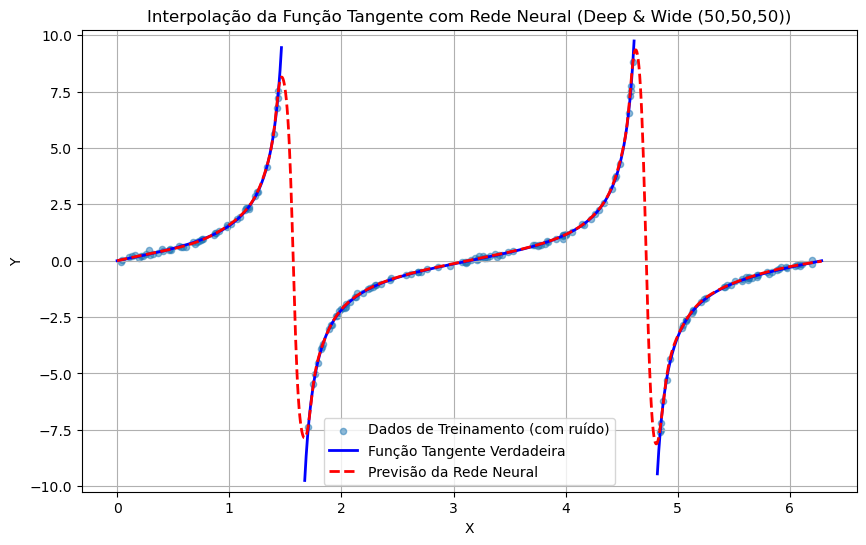


--- Treinando Tangente com arquitetura Very Deep & Wide (100,100,100,100,100) ---
Mean Squared Error (MSE) no Teste: 0.0253


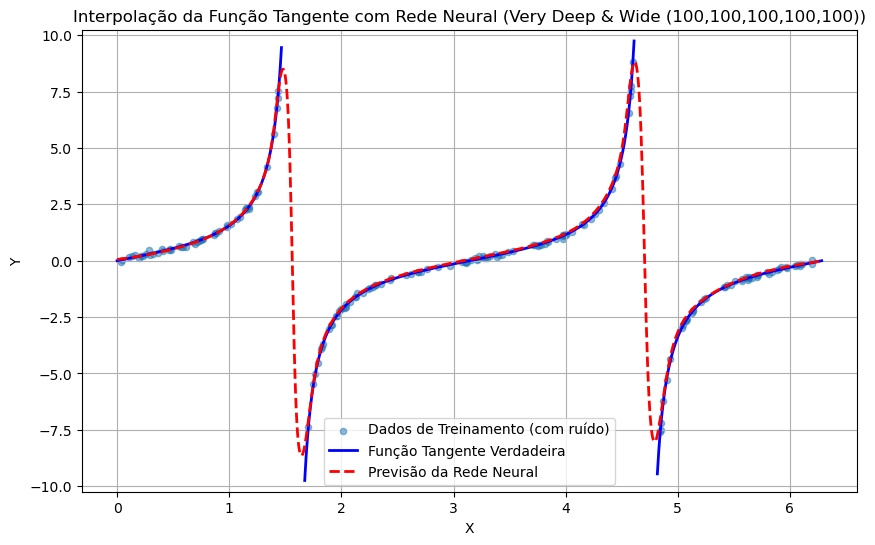


--- Treinando Sinc com arquitetura Shallow & Narrow (10) ---
Mean Squared Error (MSE) no Teste: 0.0102


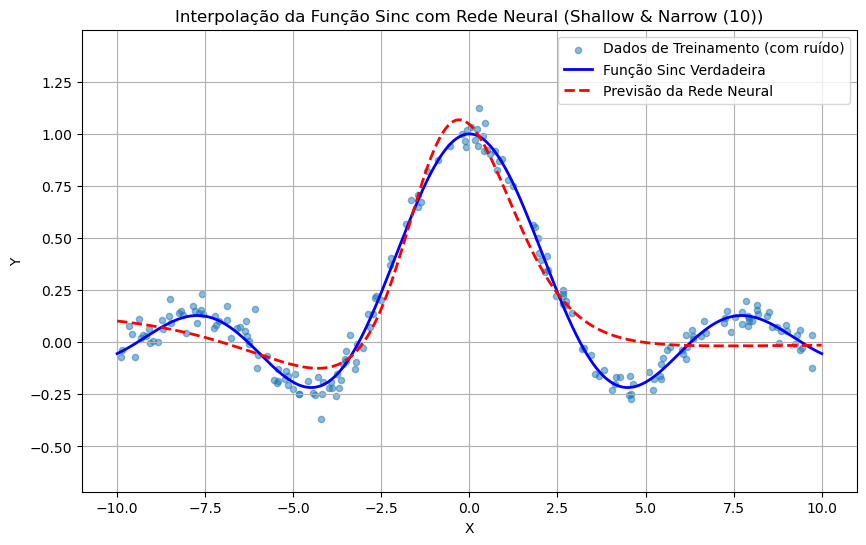


--- Treinando Sinc com arquitetura Shallow & Wide (50) ---
Mean Squared Error (MSE) no Teste: 0.0064


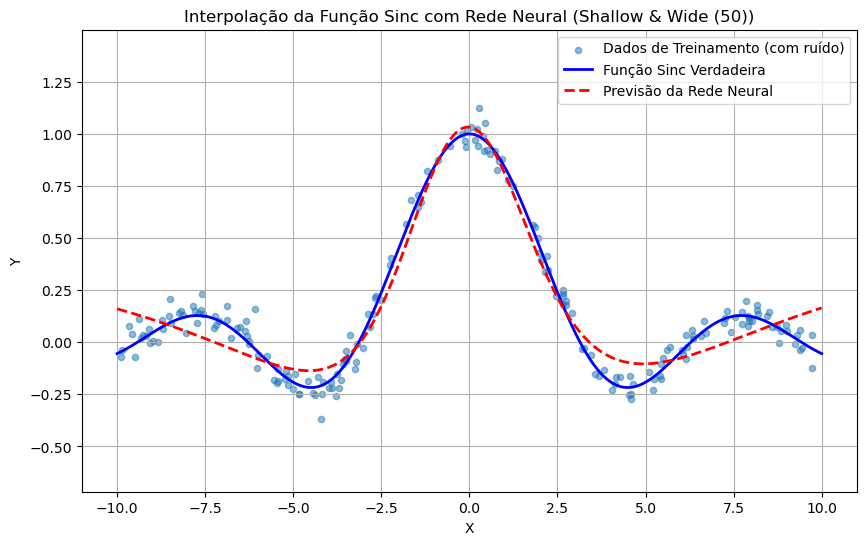


--- Treinando Sinc com arquitetura Deep & Narrow (10,10,10) ---
Mean Squared Error (MSE) no Teste: 0.0033


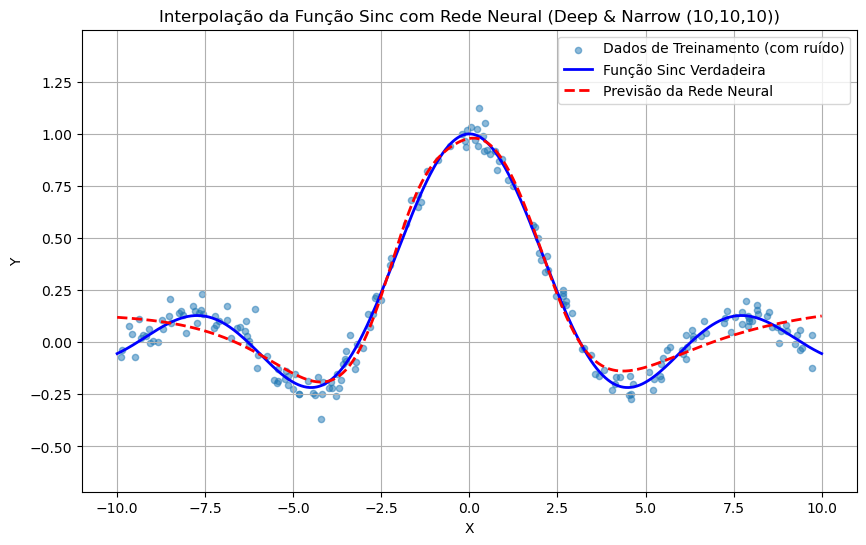


--- Treinando Sinc com arquitetura Deep & Wide (50,50,50) ---
Mean Squared Error (MSE) no Teste: 0.0005


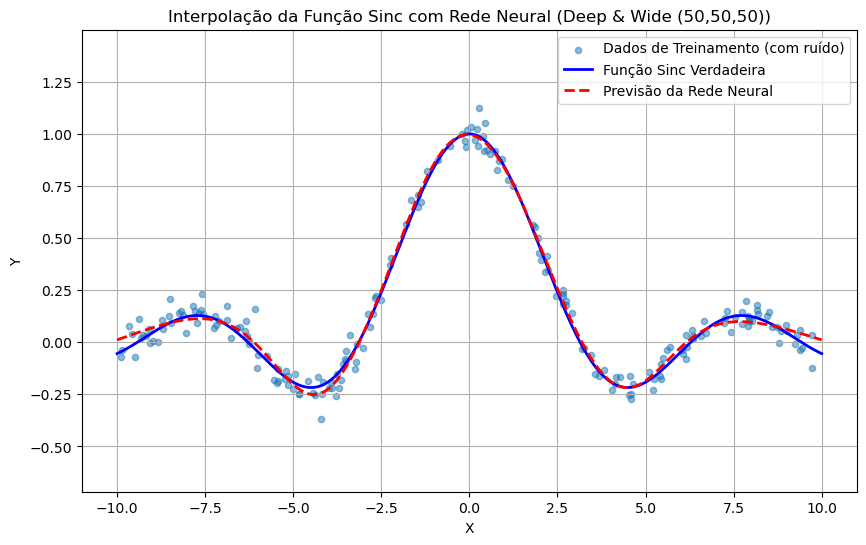


--- Treinando Sinc com arquitetura Very Deep & Wide (100,100,100,100,100) ---
Mean Squared Error (MSE) no Teste: 0.0004


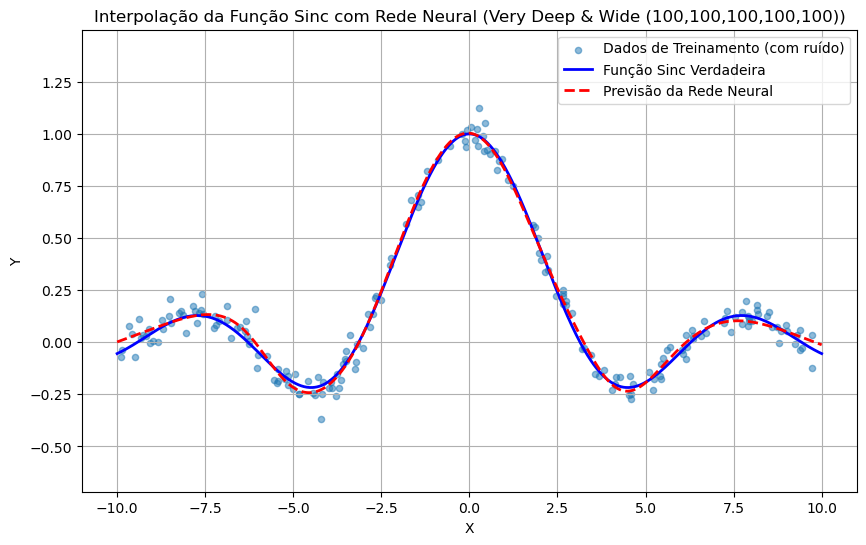


--- Treinando Gaussiana com arquitetura Shallow & Narrow (10) ---
Mean Squared Error (MSE) no Teste: 0.0012


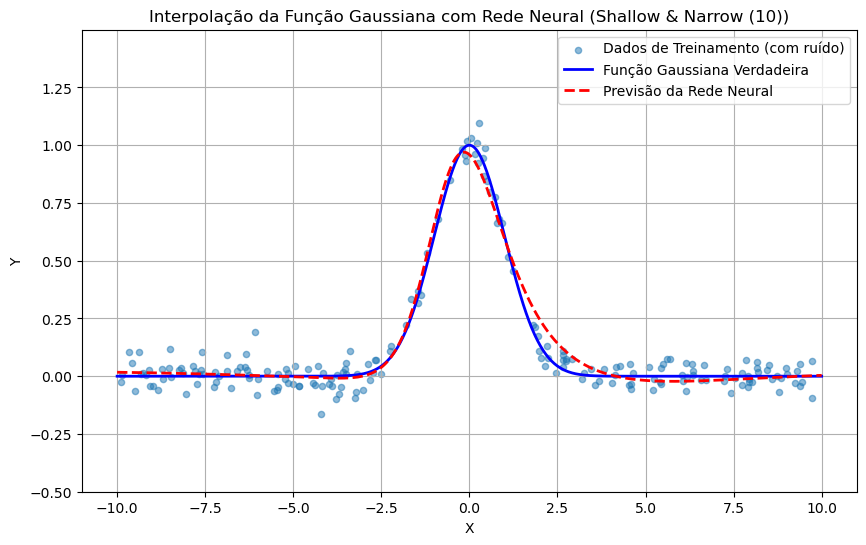


--- Treinando Gaussiana com arquitetura Shallow & Wide (50) ---
Mean Squared Error (MSE) no Teste: 0.0010


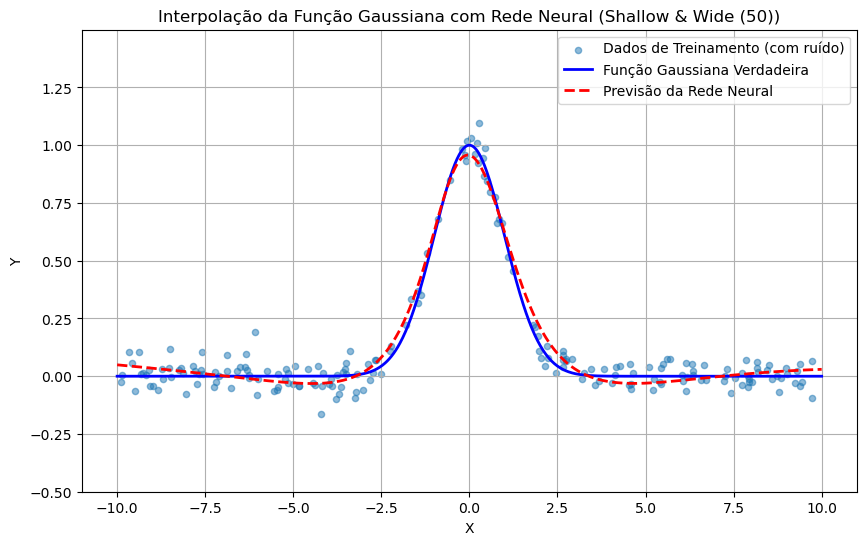


--- Treinando Gaussiana com arquitetura Deep & Narrow (10,10,10) ---
Mean Squared Error (MSE) no Teste: 0.0004


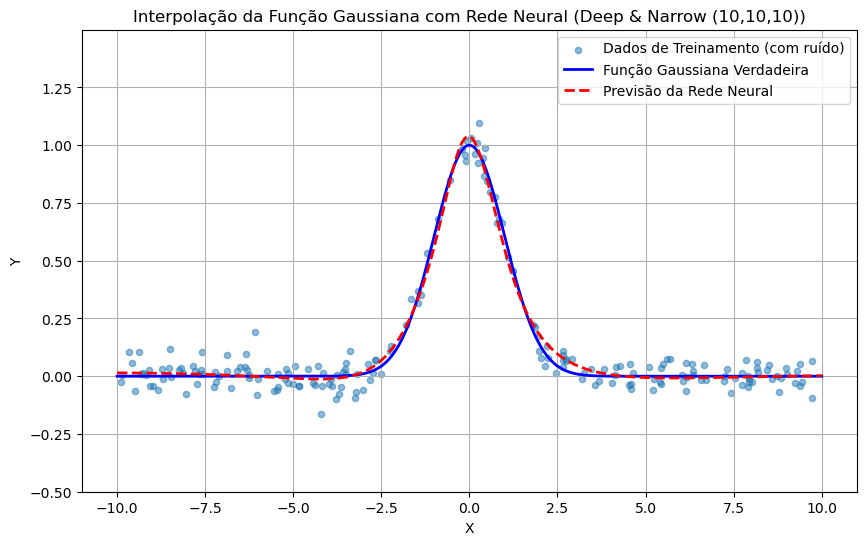


--- Treinando Gaussiana com arquitetura Deep & Wide (50,50,50) ---
Mean Squared Error (MSE) no Teste: 0.0003


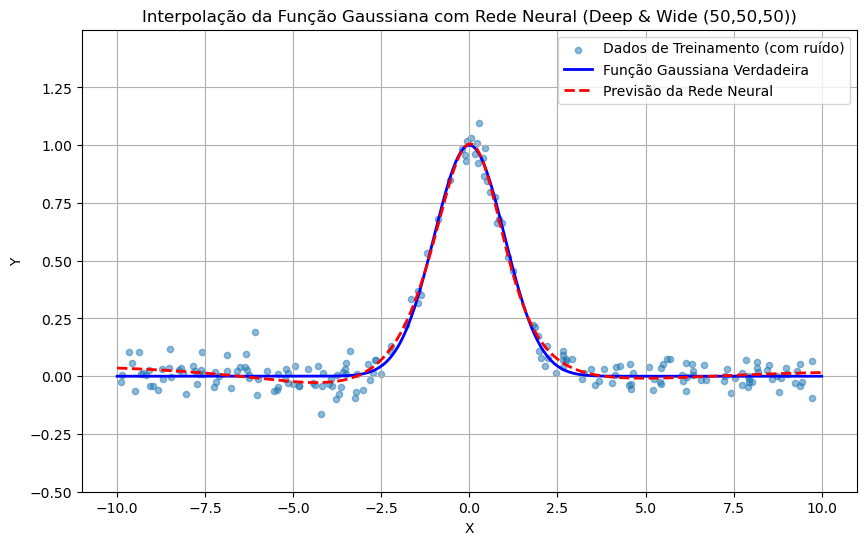


--- Treinando Gaussiana com arquitetura Very Deep & Wide (100,100,100,100,100) ---
Mean Squared Error (MSE) no Teste: 0.0005


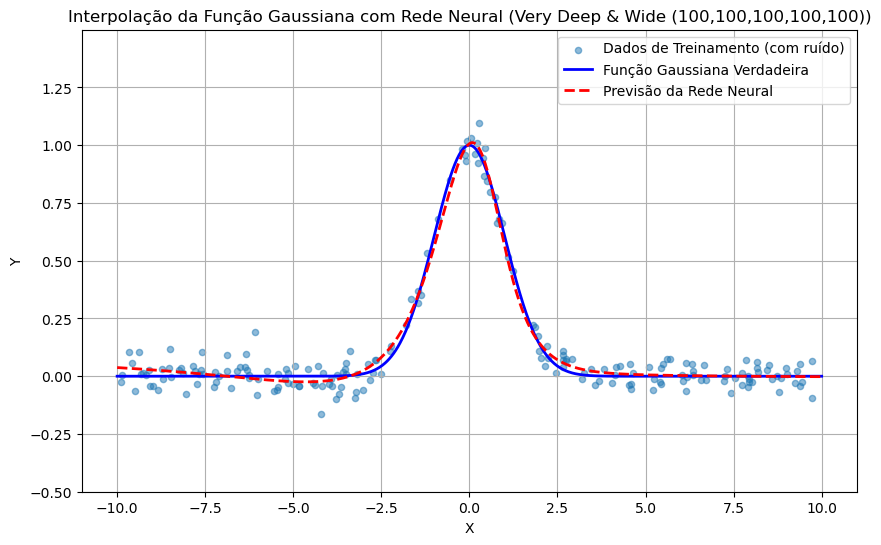

In [9]:
#Executar o Experimento
for func_name, func_info in functions_to_test.items():
    for arch_name, arch_sizes in network_architectures.items():
        train_and_plot(func_name, func_info, arch_name, arch_sizes)